# Importando bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando arquivos csv

Os arquivos originais retornaram erro de decode na primeira tentativa de serem lidos

In [2]:
# data = pd.read_csv('cars_train.csv') --> UnicodeDecodeError

Solução: abrir arquivos originais no google sheets e fazer o download do csv novamente.

In [3]:
data = pd.read_csv('cars_train - fixed.csv')

# 1 - Análise de Features

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

Utilizando o método info(), podemos verificar que o data set possui 7 features de tipo número, 19 features de tipo object e 3 features de tipo boolean.

Observando a feature 'veiculo_alienado' percebemos que ela não possui nenhum valor não nulo na tabela, o que pode representar algum erro na coleta ou na transcrição dos dados.


Podemos observar também que as features 'num_fotos', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica' e 'revisoes_dentro_agenda' possuem alguns dados indisponíveis (nulos, na, NaN). Tirando a feat 'num_fotos' que é quantitativa, nas outras features, por serem qualitativas, a ausência de um valor pode significar a negação de sua característica (dependendo do contexto). Podemos confirmar essa informação checando que essas features possuem apenas um registro de valor, assim faz sentido considerá-las como variáveis booleanas (sim e não, possui e não possui, etc)

In [5]:
data[['dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago']].value_counts()

dono_aceita_troca  veiculo_único_dono  revisoes_concessionaria                       ipva_pago
Aceita troca       Único dono          Todas as revisões feitas pela concessionária  IPVA pago    1216
dtype: int64

In [6]:
data[['dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago']].value_counts()

dono_aceita_troca  veiculo_único_dono  revisoes_concessionaria                       ipva_pago
Aceita troca       Único dono          Todas as revisões feitas pela concessionária  IPVA pago    1216
dtype: int64

Utilizando o método describe(), podemos visualizar melhor como as features de tipo número estão distribuídas:

In [7]:
data.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco
count,29407.000000,29584.000000,29584.000000,29584.000000,29584.000000,0.0,2.958400e+04
mean,10.323834,2016.758552,2017.808985,58430.592077,3.940677,NaN,1.330239e+05
std,3.487334,4.062422,2.673930,32561.769309,0.338360,NaN,8.166287e+04
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,NaN,9.869951e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,NaN,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,NaN,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,NaN,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,NaN,1.359813e+06


Atentando-se ao dado de valor mínimo (min) para as features 'ano_de_fabricacao' e 'ano_modelo', surge um questionamento: **faz sentido o menor ano de fabricação registrado ser 1985 e o menor ano de modelo registrado ser 1997?** Investigando mais aprofundadamente, descobrimos que existem vários registros com ano de fabricação bem menor do que o ano de modelo

In [8]:
# Filtro carros com ano de fabricação muito abaixo do ano de modelo
filtro = (data['ano_modelo'] - data['ano_de_fabricacao']>3)

data[filtro].sort_values('ano_de_fabricacao')

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
590,317058348344627599337634039380150700902,8.0,VOLKSWAGEN,GOL,1.6 MI POWER 8V FLEX 4P MANUAL G.III,1985,2013.0,192182.0,Manual,4,...,False,NaN,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,22520.067767
19658,64369313258166945961672474305820655846,8.0,VOLKSWAGEN,FUSCA,1.6 8V GASOLINA 2P MANUAL,1988,2011.0,3548.0,Manual,4,...,False,NaN,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,28875.849751
13276,51936966583809049009169550364057097722,8.0,PEUGEOT,307,2.0 GRIFFE 16V GASOLINA 4P AUTOMÁTICO,1988,2011.0,163780.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,24093.833734
2032,22317396938262813942522874147555341460,8.0,VOLKSWAGEN,GOL,1.6 MI POWER 8V FLEX 4P MANUAL G.IV,1990,2010.0,146304.0,Manual,4,...,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,16782.044869
1156,120618350228284858326813530052157947976,16.0,FIAT,PALIO,1.3 MPI FIRE ELX WEEKEND 8V FLEX 4P MANUAL,1990,2013.0,171889.0,Manual,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26669.839995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21856,192248695249104148387700991312442484247,8.0,AUDI,Q3,2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC,2013,2017.0,70557.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,230190.315427
22085,329116392430975907307979672503150816286,15.0,AUDI,Q3,2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC,2013,2017.0,77409.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206547.855575
28980,114161983753521009958220745869816770451,8.0,TOYOTA,COROLLA,2.0 XEI 16V FLEX 4P AUTOMÁTICO,2015,2019.0,55548.0,Automática,4,...,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,102404.963149
3324,84217579250235874020049371593041153452,8.0,AUDI,A1,1.4 TFSI SPORTBACK SPORT EDITION 16V GASOLINA ...,2015,2019.0,60005.0,Automática,4,...,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,89760.071739


<Axes: >

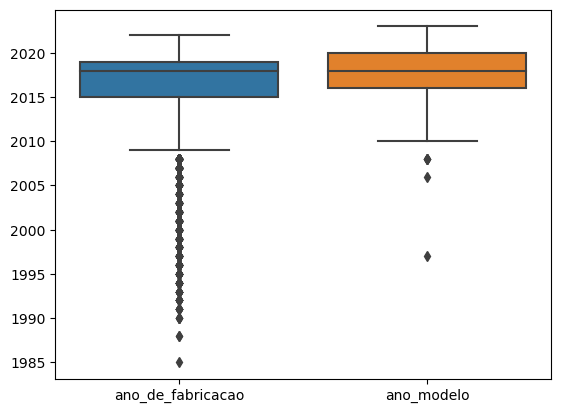

In [9]:
sub_df = data[['ano_de_fabricacao', 'ano_modelo']]
sns.boxplot(sub_df)

Pesquisando por mais informações, podemos conferir que em 2001, entrou em vigor a portaria 23/2001 aprovada pelo Departamento Nacional de Trânsito (DENATRAN) que diz que o ano de fabricação de um veículo precisa ser igual ao do seu modelo, tendo um ano de tolerância para mais ou para menos. (https://www.gov.br/transportes/pt-br/assuntos/transito/conteudo-Senatran/portarias-2001-denatran). A partir dessa informação, poderíamos investigar mais a fundo como foi feita a coleta desses dados, a fim de descobrir se houve algum erro de cadastramento ou dúvida na inserção dos dados por parte dos vendedores, etc.

Outra possível abordagem para o tratamento desses dados (menos trabalhosa, porém com menos chances de se obter uma acurácia maior) seria aproximar o valor do ano de fabricação para o valor do ano de modelo ou vice e versa (nesse caso, aproximar os valores de fabricação para os valores de modelo diminuiria a quantidade de outliers). Por enquanto, vamos deixar apenas como observação

Ainda utilizando o método describe() e desta vez observando o **Desvio Padrão (std)**, percebe-se que os valores encontrados nas features 'hodometro' e 'preco' encontram-se bastante elevados, o que poderia ser um indicativo de **outliers**

<Axes: >

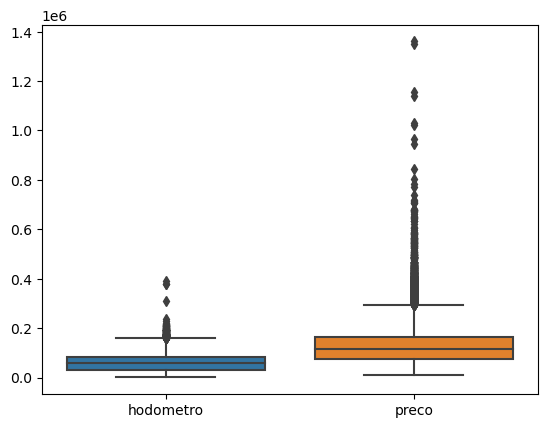

In [10]:
sub_df = data[['hodometro', 'preco']]
sns.boxplot(sub_df)

Utilizando gráficos boxplot para visualizar as duas features concluímos que de fato elas possuem vários outliers, o que pode afetar o valor da média de ambas as variáveis.

**Investigando outliers PREÇO**

<Axes: xlabel='preco', ylabel='marca'>

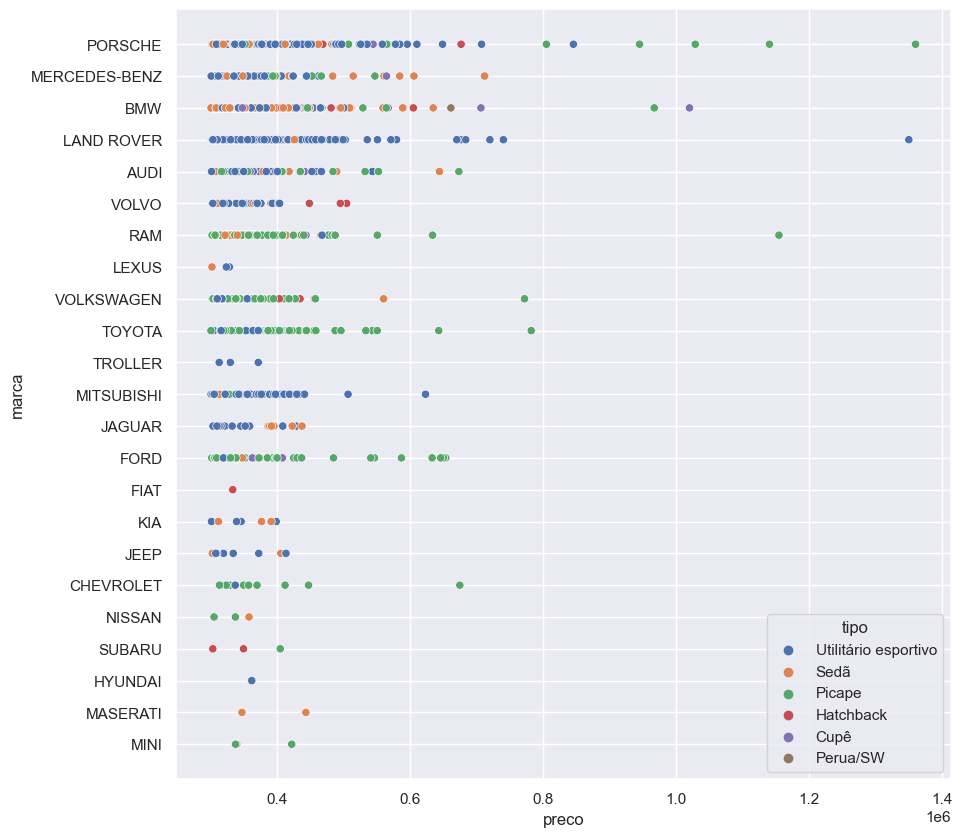

In [11]:
filtro = (data['preco'] > 300000)

outliers_preco = data[filtro]

sns.set(rc = {'figure.figsize':(10, 10)})
sns.scatterplot(outliers_preco, y='marca', x='preco', hue='tipo')

In [12]:
outliers_preco['tipo'].value_counts()

Utilitário esportivo    615
Picape                  404
Sedã                    250
Hatchback                53
Cupê                     20
Perua/SW                  3
Name: tipo, dtype: int64

In [13]:
outliers_preco['marca'].value_counts()

BMW              222
PORSCHE          185
TOYOTA           171
LAND ROVER       156
MERCEDES-BENZ    125
RAM               96
AUDI              87
VOLKSWAGEN        77
MITSUBISHI        74
VOLVO             45
FORD              42
JAGUAR            20
CHEVROLET         11
JEEP               8
KIA                7
LEXUS              3
TROLLER            3
NISSAN             3
SUBARU             3
MINI               3
MASERATI           2
FIAT               1
HYUNDAI            1
Name: marca, dtype: int64

**Investigando outliers HODOMETRO**

<Axes: xlabel='hodometro', ylabel='marca'>

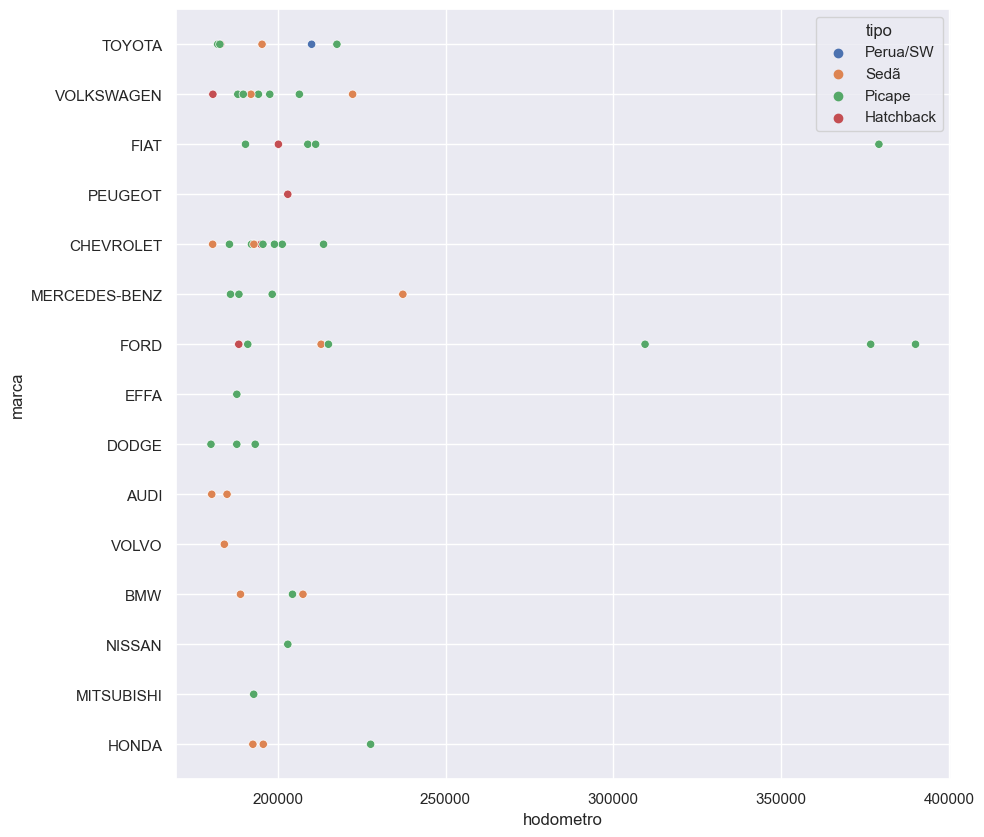

In [14]:
filtro = (data['hodometro'] > 180000)

outliers_hodometro = data[filtro]

sns.set(rc = {'figure.figsize':(10, 10)})
sns.scatterplot(outliers_hodometro, y='marca', x='hodometro', hue='tipo')

In [15]:
outliers_hodometro['tipo'].value_counts()

Picape       36
Sedã         16
Hatchback     6
Perua/SW      1
Name: tipo, dtype: int64

In [16]:
outliers_hodometro['marca'].value_counts()

CHEVROLET        12
VOLKSWAGEN        9
FORD              7
TOYOTA            6
FIAT              5
MERCEDES-BENZ     4
DODGE             3
BMW               3
HONDA             3
AUDI              2
PEUGEOT           1
EFFA              1
VOLVO             1
NISSAN            1
MITSUBISHI        1
Name: marca, dtype: int64

**Conclusões Analíse de Features**

# 2 - EDA

**Crie e responda 3 hipóteses de negócio**

**Perguntas do Desafio**

**a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?**

Analisando esta pesquisa do globo.com de 2023 (https://autoesporte.globo.com/mercado/noticia/2023/02/os-10-principais-carros-populares-vendidos-do-brasil-em-2023.ghtml), foram consideradas como marcas populares as seguintes:

Volkswagen, Fiat, Ford, Citroën, Toyota, Chevrolet, Renault, Hyundai, Honda

O preço é outra característica levada em consideração quando definimos 'marcas populares', pois estas normalmente representam carros mais baratos, porém devido ao aumento dos preços nos últimos anos, esse conceito não está mais tão bem definido.

Para este estudo e levando em consideração a pesquisa acima, foram considerados carros de 'marca popular' aqueles com valor abaixo de R$ 80.000,00.

<Axes: xlabel='preco', ylabel='estado_vendedor'>

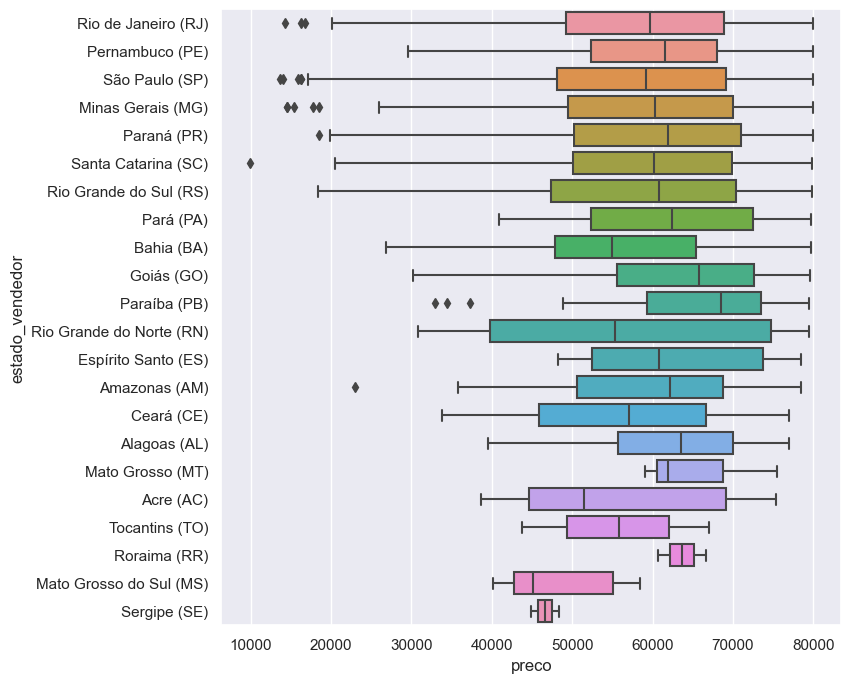

In [17]:
# Lista de carros populares
populares = ['VOLKSWAGEN', 'FIAT', 'FORD', 'CITROEN', 'TOYOTA', 'CHEVROLET', 'RENAULT', 'HYUNDAI', 'HONDA']

# Filtro para visualizar carros populares
filtro = (data['preco'] < 80000) & (data['marca'].isin(populares))

carros_populares = data.loc[filtro]

# Ordena carros populares por preço e em ordem descrescente
carros_populares = carros_populares[['estado_vendedor', 'preco']].sort_values('preco', ascending=False)

sns.set(rc = {'figure.figsize':(8, 8)})
sns.boxplot(carros_populares, x='preco', y='estado_vendedor')


In [18]:
carros_populares[carros_populares['estado_vendedor']=='Paraíba (PB)'].count()

estado_vendedor    43
preco              43
dtype: int64

**Resposta:**

Analisando os boxplots acima e considerando a mediana como a referência de valor médio de mercado (alguns estados possuem muitos outliers o que comprometeria o valor médio real caso a média fosse escolhida como referência), podemos ver que o estado da Paraíba apresenta indícios de possuir o maior valor médio de mercado entre carros populares. Isso não significa que essa observação seja um fato, uma vez que, utilizando essa base de dados, o número de amostras observadas para essa conclusão é de apenas 43. Essa observação também é construida a partir da premissa de que a colocação "melhor estado para se vender" signifique "estado no qual pudesse se obter o maior lucro".

Outro possível entendimento para a colocação "melhor estado para se vender" pode estar ligado à ideia de "vender mais rápido", num estado com o "mercado mais aquecido". Nesse caso, o estado de São Paulo talvez pudesse ser considerado o melhor, uma vez que possui a maior quantidade de vendedores (observar celulas abaixo), dado que poderia estar relacionado também com uma maior quantidade de vendas ou demandas, movimentaçao de mercado, etc.

Obs: As conclusões acima são apenas baseadas em preço. Caso fossem consideradas variavéis qualitativas (cor, modelo, versao, etc) os cenários muito provavelmente seriam diferentes.

<Axes: xlabel='preco', ylabel='estado_vendedor'>

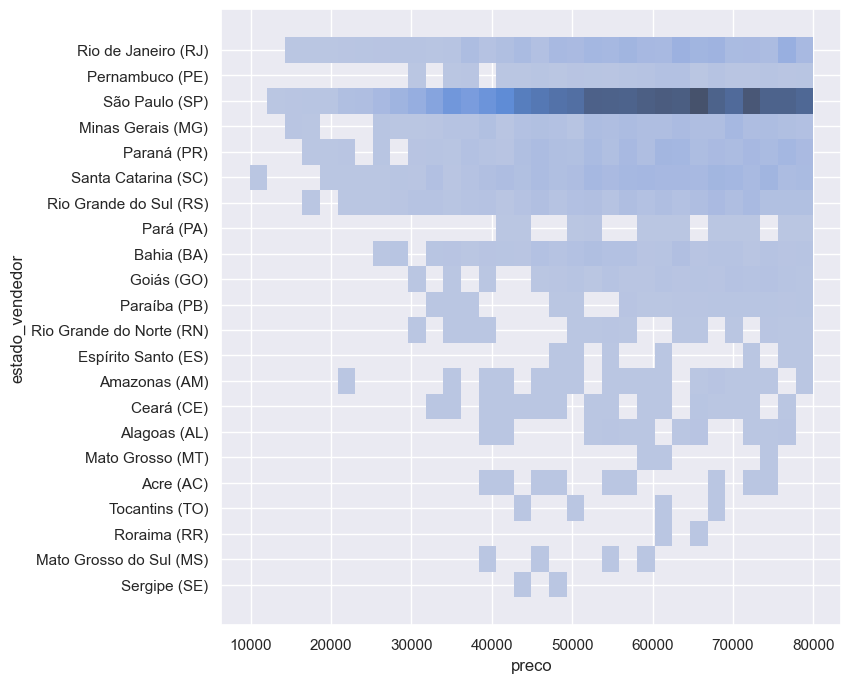

In [19]:
sns.set(rc = {'figure.figsize':(8, 8)})
sns.histplot(carros_populares, x='preco', y='estado_vendedor')

In [20]:
carros_populares['estado_vendedor'].value_counts()

São Paulo (SP)              3863
Rio de Janeiro (RJ)          553
Santa Catarina (SC)          484
Paraná (PR)                  415
Minas Gerais (MG)            321
Rio Grande do Sul (RS)       284
Bahia (BA)                   158
Pernambuco (PE)               89
Goiás (GO)                    88
Paraíba (PB)                  43
Amazonas (AM)                 27
Alagoas (AL)                  26
Ceará (CE)                    26
Rio Grande do Norte (RN)      24
Pará (PA)                     17
Acre (AC)                     12
Espírito Santo (ES)            7
Mato Grosso do Sul (MS)        7
Tocantins (TO)                 4
Mato Grosso (MT)               3
Roraima (RR)                   2
Sergipe (SE)                   2
Name: estado_vendedor, dtype: int64

**b. Qual o melhor estado para se comprar uma picape com transmissão
automática e por quê?**

<Axes: xlabel='preco', ylabel='estado_vendedor'>

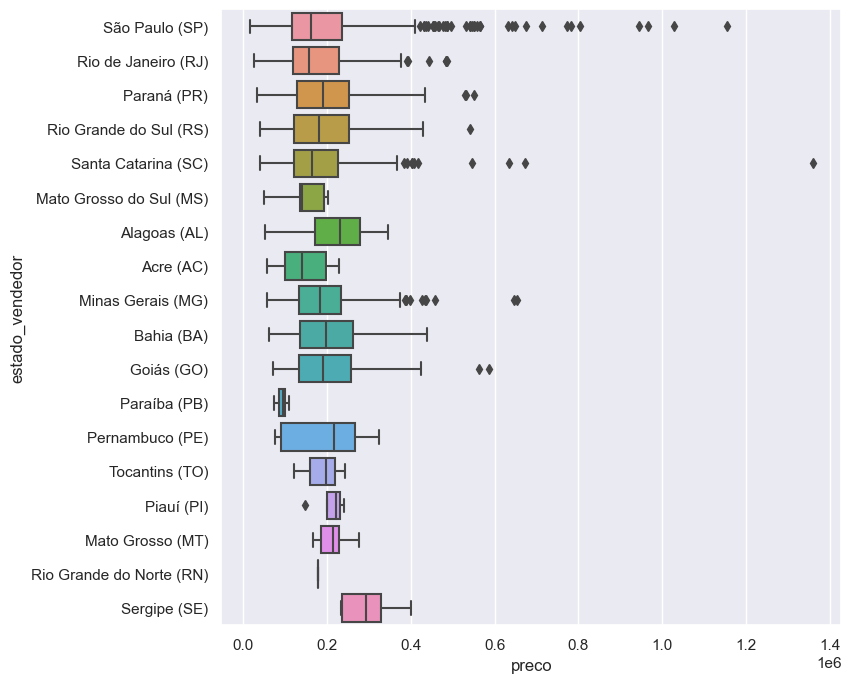

In [21]:
# Filtro para picape com trasmissão automática
filtro = (data['tipo'] == 'Picape') & (data['cambio'] == 'Automática')

pic_auto = data.loc[filtro]

# Ordena picapes por preço e em ordem crescente
pic_auto = pic_auto[['estado_vendedor', 'preco']].sort_values('preco')

sns.set(rc = {'figure.figsize':(8, 8)})
sns.boxplot(pic_auto, x='preco', y='estado_vendedor')


**Resposta:**

Seguindo o mesmo raciocínio da resposta do item anterior, e considerando que a colocação "melhor estado" dessa vez se refere ao "estado com valor médio de picapes automáticas mais baixo", num primeiro momento, o estado da Paraíba novamente poderia ser um candidato para essa conclusão, uma vez que possui a menor mediana do preço entre os estados. Porém, atentando-se ao gráfico e investigando mais a fundo a distribuição de vendedores por estado (Observar próxima célula), percebe-se que essa observação é baseada num número muito pequeno de amostras, apenas 4, o que poderia invalidar essa conclusão.

Caso a colocação "melhor estado para se comprar" seja interpretada como "estado com o menor preço possível de ser encontrado", o estado de São Paulo seria um bom candidato, pois possui os menores valores absolutos em comparação à outros estados. Isso, por sua vez, não é garantia de que o comprador conseguirá de fato comprar uma picape automática pelo menor preço, apenas de que ele tem mais indícios de possivelmente encontrá-la. 

Outra interpretação para a pergunta poderia ser em relação à variedade/opções de escolhas. Sem possuir mais especificações como cor, modelo, ano de fabricação, etc, uma possível abordagem para essa questão poderia ser procurar um estado com mais oferta, o que num primeiro momento, poderia refletir em mais chances de se encontrar uma picape com mais características que se encaixem com o desejo do comprador. A partir disso, o estado de São Paulo poderia ser uma boa opção.

In [22]:
pic_auto['estado_vendedor'].value_counts()

São Paulo (SP)              1712
Paraná (PR)                  348
Rio de Janeiro (RJ)          318
Santa Catarina (SC)          283
Minas Gerais (MG)            211
Rio Grande do Sul (RS)       198
Goiás (GO)                   102
Bahia (BA)                    68
Pernambuco (PE)               14
Alagoas (AL)                  12
Acre (AC)                      6
Mato Grosso (MT)               6
Mato Grosso do Sul (MS)        5
Sergipe (SE)                   5
Paraíba (PB)                   4
Piauí (PI)                     4
Tocantins (TO)                 3
Rio Grande do Norte (RN)       1
Name: estado_vendedor, dtype: int64

**c. Qual o melhor estado para se comprar carros que ainda estejam dentro
da garantia de fábrica e por quê?**

<Axes: xlabel='preco', ylabel='estado_vendedor'>

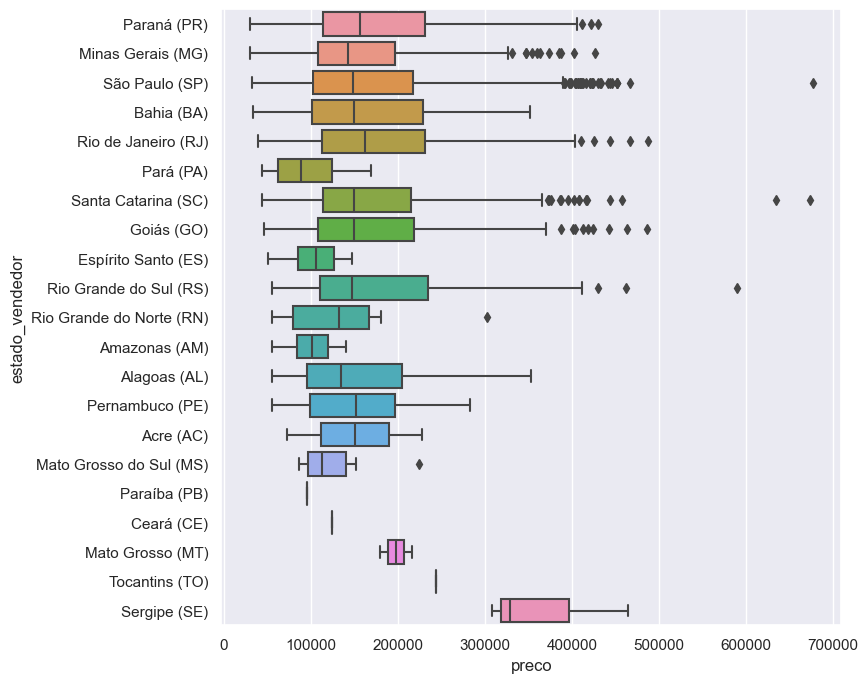

In [23]:
# Para a obtenção desses dados, considerou-se os valores ausentes como sendo carros 'sem garantia de fábrica'
garantia = data[data['garantia_de_fábrica'] == 'Garantia de fábrica']

# Ordena carros por preço e em ordem crescente
garantia = garantia[['estado_vendedor', 'preco']].sort_values('preco')

sns.set(rc = {'figure.figsize':(8, 8)})
sns.boxplot(garantia, x='preco', y='estado_vendedor')

In [24]:
garantia['estado_vendedor'].value_counts()

São Paulo (SP)              2307
Rio de Janeiro (RJ)          412
Paraná (PR)                  389
Santa Catarina (SC)          330
Rio Grande do Sul (RS)       281
Minas Gerais (MG)            264
Goiás (GO)                   186
Alagoas (AL)                  58
Bahia (BA)                    51
Pernambuco (PE)               20
Pará (PA)                     17
Mato Grosso do Sul (MS)       13
Rio Grande do Norte (RN)       9
Amazonas (AM)                  9
Espírito Santo (ES)            9
Sergipe (SE)                   3
Acre (AC)                      2
Mato Grosso (MT)               2
Paraíba (PB)                   1
Ceará (CE)                     1
Tocantins (TO)                 1
Name: estado_vendedor, dtype: int64

**Resposta:**

Seguindo um raciocínio parecido com os das respostas anteriores e considerando-se que "melhor estado para se comprar" refere-se à ideia de "menor preço" ou "opções mais baratas", num primeiro momento, o estado do Pará nos chama mais atenção, pois possui o valor de mediana mais baixo entre os estados, o que poderia refletir num valor médio de mercado mais baixo também. Porém, investigando mais a fundo a distribuição de vendedores por estado, percebemos que a quantidade de amostras utilizada na "possível" conclusão anterior é muito pequena, sendo baseada apenas em 17 valores. Sendo assim, assumir a conclusão acima como verdadeira, sem uma investigação maior, ou sem basear-se em mais dados, poderia ser preciptado e refletir num cenário irreal.


In [25]:
garantia[garantia['estado_vendedor']=='Pará (PA)']

,estado_vendedor,preco
25494,Pará (PA),43906.629995
17,Pará (PA),52375.520054
23435,Pará (PA),52740.962596
14899,Pará (PA),59950.845994
16213,Pará (PA),62481.037753
19875,Pará (PA),76343.287398
4978,Pará (PA),79691.756050
9864,Pará (PA),87576.349020
5023,Pará (PA),87914.540316
10578,Pará (PA),88001.019272


**Conclusões Finais**


Concluir